In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
# 1. Get the data

In [96]:
df = pd.read_csv('E:/ML_Datasets/insurance2.csv')

In [97]:
df.head()

,Years,sex,bmi,children,insurance,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,yes,southeast,1725.55230
2,28,male,33.000,3,yes,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,yes,northwest,3866.85520


In [98]:
df=df.drop(['region'],axis=1)

In [99]:
df.head()

,Years,sex,bmi,children,insurance,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,yes,1725.55230
2,28,male,33.000,3,yes,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,yes,3866.85520


In [100]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['sex']=label.fit_transform(df['sex'])
df['insurance']=label.fit_transform(df['insurance'])

In [101]:
df

,Years,sex,bmi,children,insurance,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,1,1725.55230
2,28,1,33.000,3,1,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [102]:
x=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [103]:
x.head(2)

,Years,sex,bmi,children,insurance
0,19,0,27.90,0,1
1,18,1,33.77,1,1


In [104]:
y.head(2)

,charges
0,16884.9240
1,1725.5523


In [105]:
# standerdise the data

In [106]:
df.describe()

,Years,sex,bmi,children,insurance,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.213752,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.410107,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [115]:
x_scaled=pd.DataFrame(x_scaled,columns=df.columns[:5])

In [116]:
x_scaled

,Years,sex,bmi,children,insurance
0,-1.438764,-1.010519,-0.453320,-0.908614,1.917895
1,-1.509965,0.989591,0.509621,-0.078767,1.917895
2,-0.797954,0.989591,0.383307,1.580926,1.917895
3,-0.441948,0.989591,-1.305531,-0.908614,-0.521405
4,-0.513149,0.989591,-0.292556,-0.908614,1.917895
...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.521405
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.521405
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.521405
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.521405


In [117]:
# pairplot

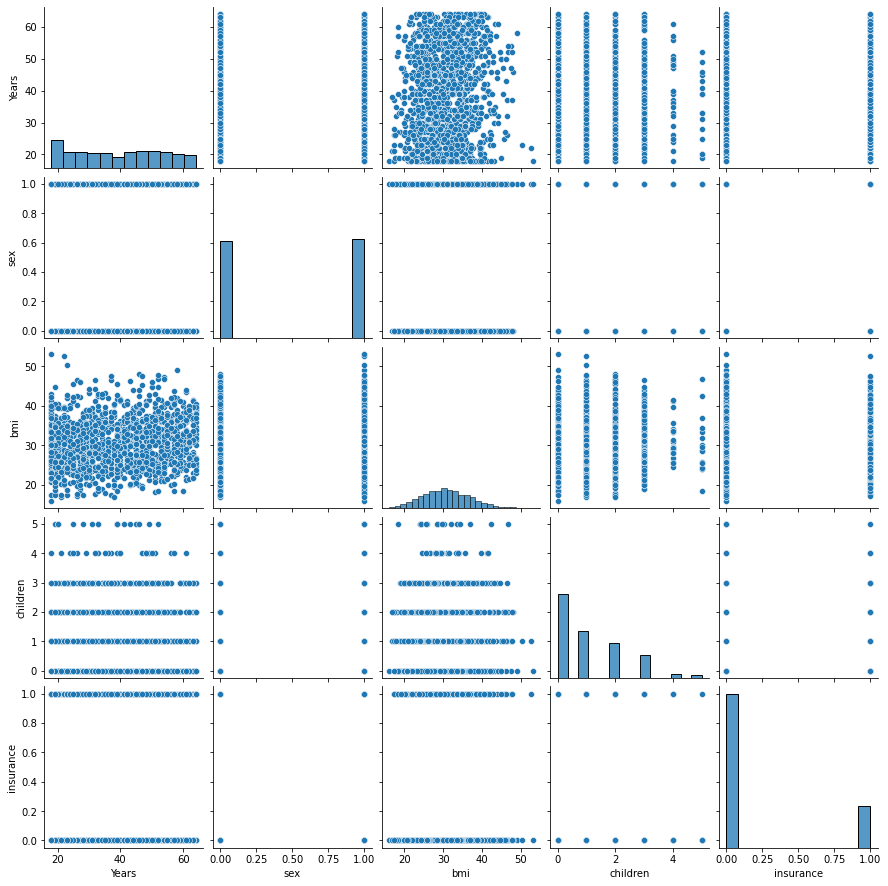

In [118]:
sns.pairplot(x)

In [119]:
# train_test_split

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [121]:
# using knn

In [127]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)

In [129]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)

In [130]:
mse

130563212.77676478

In [133]:
import numpy as np
np.sqrt(mse)

11426.426071907383

In [134]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=4)
    accuracy_rate.append(score.mean())
    

Text(0.5, 1.0, 'k vs accuracy_rate')

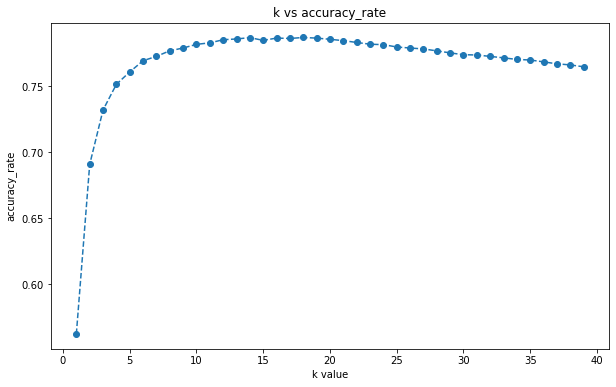

In [135]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,marker='o',linestyle='dashed')
plt.xlabel('k value')
plt.ylabel('accuracy_rate')
plt.title('k vs accuracy_rate')


In [137]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=4)
    error_rate.append(score.mean())

Text(0.5, 1.0, 'k vs error_rate')

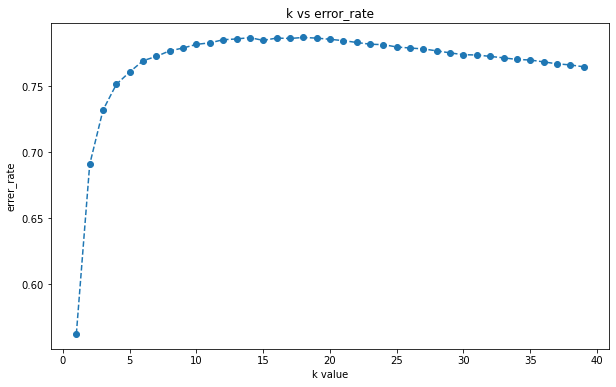

In [140]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed')
plt.xlabel('k value')
plt.ylabel('errer_rate')
plt.title('k vs error_rate')

In [143]:
# if k=20
knn=KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Mean Squared Error is :')
mse=mean_squared_error(y_test,y_pred)
print(mse)
print('Root mean squared is:')
print(np.sqrt(mse))

Mean Squared Error is :
124554083.59153977
Root mean squared is:
11160.38008275434
